# Pre-processing CaT stellar library spectra

Data download: http://svocats.cab.inta-csic.es/catlib
#### ACKNOWLEDGMENT
This work is based on data from the CaT service developed by the Spanish Virtual Observatory in the framework of the IAU Comission G5 Working Group : Spectral Stellar Libraries.

In [1]:
from astropy.io import fits
import matplotlib.pylab as plt
import numpy as np

import os
from fnmatch import fnmatch

from pathlib import Path

In [2]:
root = '## YOUR FOLDER PATH TO THE DOWNLOADED SPECTRA ##'
target = "scan001.fits"

In [3]:
for path, subdirs, files in os.walk(root):
    for name in files:
        if fnmatch(name, target):
            print([os.path.join(path, name)])

['/Users/adrian/Documents/FITS_Library/CaT_library_v9.1_FITS/scan001.fits']


In [4]:
file = [os.path.join(path, name)]
str = " " 
Ffile = (str.join(file))  

route = Path(Ffile)

Fname = route.with_suffix('')

In [5]:
type (Ffile)
print (Ffile)
print (Fname)

/Users/adrian/Documents/FITS_Library/CaT_library_v9.1_FITS/scan347.fits
/Users/adrian/Documents/FITS_Library/CaT_library_v9.1_FITS/scan347


## Data overview

In [6]:
from astropy.io import fits

file = "/Users/adrian/Documents/FITS_Library/CaT_library_v9.1_FITS/scan145.fits"

sp = fits.open(file)
print('\n\nHeader of the spectrum :\n\n', sp[0].header, '\n\n')

flux2 = np.zeros(sp[0].header['NAXIS1'], dtype=float)
flux2 = np.array(sp[0].data)
flux_norm = flux2/(np.nanmax(flux2))

wave2 = np.ones(sp[0].header['NAXIS1'], dtype=float)
for i in range(sp[0].header['NAXIS1']):
    wave2[i] = sp[0].header['CRVAL1'] + i*sp[0].header['CDELT1']



Header of the spectrum :

 SIMPLE  =                    T / file does conform to FITS standard             BITPIX  =                  -32 / number of bits per data pixel                  NAXIS   =                    2 / number of data axes                            NAXIS1  =                  790 / length of data axis 1                          NAXIS2  =                    1 / length of data axis 2                          COMMENT   FITS (Flexible Image Transport System) format defined in Astronomy andCOMMENT   Astrophysics Supplement Series v44/p363, v44/p371, v73/p359, v73/p365.COMMENT   Contact the NASA Science Office of Standards and Technology for the   COMMENT   FITS Definition document #100 and other FITS information.             COMMENT   ----------------------------------------------------------------------COMMENT   ************************** REDUCEME HEADER ***************************COMMENT   ----------------------------------------------------------------------HISTORY   D

In [7]:
flux_ok = np.reshape(flux_norm, (sp[0].header['NAXIS1']))

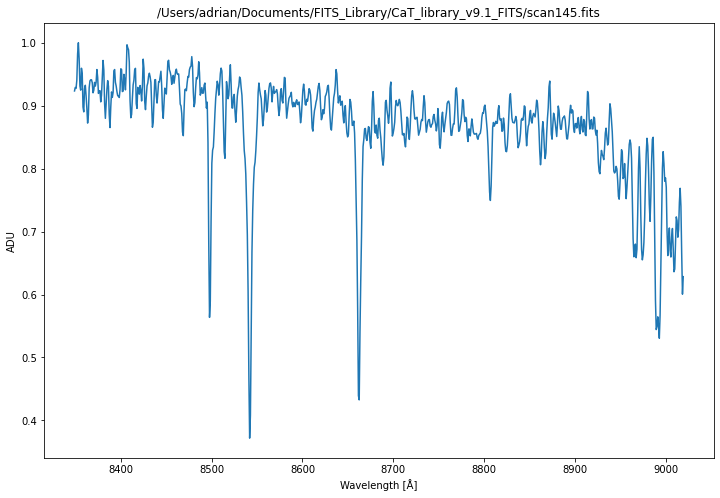

In [8]:
# Plot the spectrum
fig = plt.figure(1, figsize=(12, 8))
plt.plot(wave2, flux_ok)
plt.xlabel('Wavelength [Å]')
plt.ylabel('ADU')
plt.title(file)
plt.show()

Number of files in the folder

In [9]:
num = 1
dim1 = sp[0].header['NAXIS1']
#dim2=1

for path, subdirs, files in os.walk(root):
    for nanme in files:
        num += 1
print(num)
print(dim1)

707
790


In [10]:
import tensorflow as tf
autoencoder = tf.keras.models.load_model('2layers_6dim_CaT_autoencoder.tf')

2024-02-03 19:01:16.591879: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F AVX512_VNNI FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [11]:
Fname

PosixPath('/Users/adrian/Documents/FITS_Library/CaT_library_v9.1_FITS/scan347')

In [12]:
Ffile

'/Users/adrian/Documents/FITS_Library/CaT_library_v9.1_FITS/scan347.fits'

In [13]:
file

'/Users/adrian/Documents/FITS_Library/CaT_library_v9.1_FITS/scan145.fits'

In [14]:
name

'scan347.fits'

In [15]:
rec_route = '## YOUR PATH TO CREATE THE IMAGE DATABASE ##'

In [16]:
rec_route+name

'/Volumes/WORK/DOCTORADO_UPM/Library/CaT/scan347.fits'

In [17]:
os.path.splitext(os.path.splitext(name)[0])[0]

'scan347'

In [18]:
rec_route + os.path.splitext(os.path.splitext(name)[0])[0]

'/Volumes/WORK/DOCTORADO_UPM/Library/CaT/scan347'

## Preprocessing spectra

In [19]:
from scipy.signal import find_peaks
from sklearn.metrics import r2_score

In [ ]:
latent_dim = 6
curves = 0
decoded_set = np.zeros((num, dim1))
label_set = np.zeros((num, ), dtype=int)
spectra_set = [''] * num

latent_set = np.zeros((num, latent_dim))
peaks_set = []
r_square_set = np.zeros((num,))

for path, subdirs, files in os.walk(root):
    for name in files:
        file = [os.path.join(path, name)]
        str = " " 
        Ffile = (str.join(file))
        route = Path(name)
        Fname = route.with_suffix('')
        Fpng = route.with_suffix('.png')

        data, header = fits.getdata(Ffile, header=True)
        hdu_number = 0
        fits.getheader(Ffile, hdu_number)
        fits_file = Ffile
        
        with fits.open(fits_file, mode='readonly') as hdulist:
            hdulist.info()
            data = np.array(hdulist[0].data)
             
            data_norm = data/(np.nanmax(data))

            label_set[curves] = curves
            spectra_set[curves] = name
                
        #calculates and represents the peaks---------
        flux_norm = np.squeeze(data_norm)

        peaks, properties = find_peaks(-flux_norm, prominence=0.15, width=1, distance = 40, rel_height = 0.5)
        properties["prominences"], properties["widths"]

        fig = plt.figure(1, figsize=(12, 8))
        plt.plot(wave2, flux_norm)
        plt.xlabel('Wavelength [Å]')
        plt.ylabel('ADU')
        plt.title(header['OBJECT'])

        plt.plot(peaks * header['CDELT1'] + sp[0].header['CRVAL1'], flux_norm[peaks], ".", color = "r")
        plt.vlines(x=peaks * header['CDELT1']+ sp[0].header['CRVAL1'], ymin=flux_norm[peaks] - properties["prominences"],
                   ymax = flux_norm[peaks], color = "r")
        
        star_name = rec_route + os.path.splitext(os.path.splitext(name)[0])[0]
        img_name = "%s.png" % star_name
        plt.savefig(img_name, format='png')

        plt.show()
        
        print("Peaks found: ", len(peaks))
        peaks_set.append(peaks)
        #-----------  
            
        hdulist.close
        
        #Autoencoding

        encoded_img = autoencoder.encoder(data_norm).numpy()
        decoded_img = autoencoder.decoder(encoded_img).numpy()
        latent_set[curves] = encoded_img
        decoded_set[curves] = decoded_img
 
        r2 = r2_score(data_norm[0], decoded_img[0], multioutput='variance_weighted')
        r_square_set[curves] = r2
        print("R_square: ", r2)
 
        
        curves += 1
        plt.close()

   
            
#--------------------------------------------------------------------
        print ("Spectra loaded:",curves);
        print ("------------------------------------")

## Checking & Saving

In [21]:
latent_set.shape

(707, 6)

In [22]:
latent_set[100]

array([0.62334186, 0.36953616, 0.33505434, 0.96863413, 0.36118969,
       0.38025385])

In [23]:
np.save('latent_CaT', latent_set)

In [24]:
np.nanmax(latent_set)

0.9984697103500366

In [25]:
np.nanmin(latent_set)

0.0

In [26]:
np.save('decoded_CaT', decoded_set)

In [27]:
np.save('r_square_CaT', r_square_set)

In [28]:
r_square_set[700]

0.9290968451972651

In [32]:
np.save('peaks_CaT', peaks_set)

In [168]:
np.save('Spectra_CaT', spectra_set)

In [169]:
spectra_set[0]

'scan446.fits'

## "Chordification" test

In [113]:
ansi_chords = (np.ceil(100*latent_set)).astype(int)
ansi_chords

array([[87, 30, 30, 96, 10, 31],
       [62, 54, 28, 98, 37, 60],
       [88, 34, 34, 96, 12, 36],
       ...,
       [77, 40, 21, 98,  9, 71],
       [56, 43, 27, 98, 50, 52],
       [ 0,  0,  0,  0,  0,  0]])

In [115]:
ansi_chords.shape

(707, 6)

In [116]:
chords = [[] for _ in ansi_chords]

In [117]:
for i in range(ansi_chords.shape[0]):
    for j in range(ansi_chords.shape[1]):
        chords[i].append(pygame.midi.midi_to_ansi_note(ansi_chords[i][j]))

In [118]:
chords

[['D#6', 'F#1', 'F#1', 'C7', 'A#-1', 'G1'],
 ['D4', 'F#3', 'E1', 'D7', 'C#2', 'C4'],
 ['E6', 'A#1', 'A#1', 'C7', 'C0', 'C2'],
 ['B4', 'F2', 'D#1', 'D7', 'C#0', 'G#4'],
 ['A5', 'B2', 'D2', 'C#7', 'C1', 'C#3'],
 ['A#2', 'F1', 'F#3', 'D#7', 'A-1', 'A4'],
 ['A#5', 'F2', 'D1', 'C#7', 'C#0', 'D#3'],
 ['G#5', 'G3', 'D1', 'C#7', 'E0', 'F#3'],
 ['F5', 'D2', 'D#0', 'D7', 'B-1', 'D#3'],
 ['A#6', 'D#6', 'C7', 'C1', 'C#-1', 'D-1'],
 ['G3', 'F#1', 'F5', 'C#7', 'A#0', 'G2'],
 ['A#2', 'C3', 'B3', 'D7', 'F2', 'E4'],
 ['C5', 'A#0', 'F#0', 'D7', 'D2', 'A1'],
 ['A#4', 'F2', 'A0', 'C#7', 'C2', 'B1'],
 ['D#5', 'B1', 'D#0', 'D7', 'F#0', 'G3'],
 ['E4', 'E6', 'C#2', 'C7', 'C0', 'D#5'],
 ['F5', 'E4', 'F1', 'D7', 'G0', 'E5'],
 ['B3', 'G#2', 'C#7', 'F6', 'E0', 'A#0'],
 ['G5', 'C#2', 'A#2', 'C#7', 'D1', 'E2'],
 ['C#5', 'G#3', 'C1', 'D7', 'A-1', 'D#5'],
 ['F#5', 'E3', 'G#1', 'D7', 'A#0', 'B3'],
 ['C#2', 'G#5', 'B3', 'C#7', 'E2', 'A#5'],
 ['A#5', 'F#3', 'D#1', 'C#7', 'F#1', 'G#3'],
 ['F#5', 'E5', 'C#1', 'C#7', 'E0',

In [121]:
from music21 import *

In [138]:
chords[2]

['E6', 'A#1', 'A#1', 'C7', 'C0', 'C2']

In [151]:
chord1 = chord.Chord(chords[2])
chord1.commonName

'incomplete dominant-seventh chord'

In [152]:
chord1.root()

<music21.pitch.Pitch A#1>

In [165]:
chord_ref = ['A#1']
chord2 = chord.Chord(chord_ref)
chord2

<music21.chord.Chord A#1>

In [154]:
chord2.root()

<music21.pitch.Pitch A#1>

In [ ]:
spectra_reff = np.zeros(len(new_chords), dtype=int)
for i in range(len(new_chords)):
    for j in range(len(spectra_strings)):
        chord1 = chord.Chord(new_chords[i])
        chord2 = chord.Chord(spectra_chords[j])
        if chord2.root() == chord1.root():
            final_chords[i] = spectra_strings[j]
            spectra_reff[i] = j
 

In [159]:
chord1.root () == chord2.root ()

True